# Video analysis

This notebook provides a template for post-processing video predictions. We start by setting the correct path and importing relevant CNNLorenzMie objects

In [1]:
import os
import numpy as np
import cv2, json
import matplotlib.pyplot as plt
from time import time
import pandas as pd

from pylorenzmie.analysis import Frame, Video

from CNNLorenzMie.Localizer import Localizer
from CNNLorenzMie.Estimator import Estimator
from CNNLorenzMie.crop_feature import crop_feature#, est_crop_frame
from CNNLorenzMie.filters import no_edges, nodoubles
from CNNLorenzMie.experiments.normalize_image import normalize_video
from CNNLorenzMie.experiments.running_normal import running_normalize

/home/group/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/group/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/group/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/group/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: Futu

Initialize and normalize a video. If the video has already been normalized, the normed images can be loaded with the set_frames() method.

In [2]:
path = './tutorials/sample_vid.avi'

video = Video(path=path)
video.normalize()
#video.set_frames()

Setting frames using contents of path ./tutorials/sample_vid/norm_images:


We can inspect each frame individually and look at the data associated. Currently, these data frames are empty because we have not performed any analysis yet.

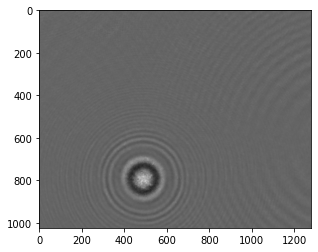

,bboxes,framenumber


In [3]:
video.frames[3].show()
display(video.frames[3].to_df())

To identify features in frames, we can use the YOLO localizer

In [4]:
print('loading Localizer...')
loc = Localizer('holo', weights='_100k')

INFO:darknet:Loading network and metadata


loading Localizer...


INFO:darknet:layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8          

In [7]:
def predict_load(frame):
    frame.load()          #### Read image from frame's path 
    
    preds = loc.predict([frame.image])#### Detect bboxes
    bboxes = [x['bbox'] for x in preds[0]]
    features = crop_feature(img_list = [frame.image], xy_preds = preds)
    frame.add(features = features, bboxes = bboxes)


for frame in video.frames:
    predict_load(frame)

Now, when we display the same frame, there is a box around the identified feature and it is shown in the data frame.

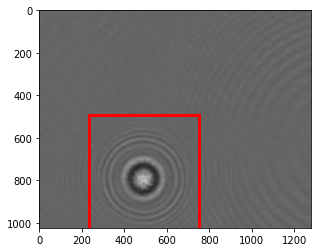

,bboxes,framenumber
0,"(492.68353271484375, 789.9138793945312, 514.43...",3


In [8]:
video.frames[3].show()
display(video.frames[3].to_df())

Set trajectories and link

In [7]:
#video.set_trajectories()
#display(video.trajectories)